# Expectation Maximisation on Mixture Model

# Table of contents
1. [Setting the ground truth](#first-bullet)
2. [Glossary of terms](#Glossary of terms)
2. [Generating samples from ground truth](#Generating samples from ground truth)
3. [Defining negative log-likelihood](#Defining negative log-likelihood)
4. [EM algorithm](#EM algorithm) 
4a. [Expectation Step](#Expectation Step) 
4b. [Maximisation Step](#Maximisation Step)
5. [Performing iterations](#Performing iterations) 
5a. [Setting the initial parameters](#Setting the initial parameters)

We model $Y$ as a mixture of two normal distirbutions, with parameters $\theta = \{\pi, \mu_1, \sigma_1, \mu_2, \sigma_2\}$:

$$
\begin{align} 
Y_1 &\sim N(\mu_1 , \sigma_1^2 ) \\
Y_2 &\sim N(\mu_2 , \sigma_2^2 ) \\
Y &= (1 - \Delta) \cdot Y_1 + \Delta \cdot Y_2
\end{align}$$

where $\Delta = \{0,1\}$ and $P(\Delta = 1) = \pi$

Following is the `pdf` of $Y$

$$p(x|\theta) = \left( 
\frac{1-\pi}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{y} - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{\pi}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{y} - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right)$$

The parameter of $Y$ is $\theta = \left\{ \pi, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2 \right\}$

# Glossary of terms <a class="anchor" id="Glossary of terms"></a>
Only these variables should appear in the paper.

What is meant by probability, likehihood and expectation?

$Y$ 

$Z$ 

$\phi$

$\pi$ 

$\mu_1$ 

$\mu_2$ 

$\sigma_1$ 

$\sigma_2$ 

$\mathbf{X}$ 

$\theta$ 

$P$ How do you define probability of getting a discrete result from a continuous function?

$P(\mathbf{X}| \theta)$

$P(\mathbf{X}| \mathbf{Z}, \theta)$

$P(\mathbf{X}, \mathbf{Z}| \theta)$

$\ell$ 

$\ell(\theta, \mathbf{X})$

$\ell(\theta| \mathbf{X})$ 

$\ell(\theta| \mathbf{X}, \mathbf{Z})$

$\ell(\theta, \mathbf{Z}|\mathbf{X})$

$z$

$\Delta$

# Setting the ground truth <a class="anchor" id="first-bullet"></a>

The parameters $\theta = \{\mu_1, \sigma_1, \mu_2, \sigma_2, \pi\}$ that is used to generate the set of samples.

In [1]:
pi_true = 0.8  # probability if it lies from normal distribution 2 
mean_1_true = 1.
stde_1_true = 1.0
mean_2_true = 4.
stde_2_true = 0.8

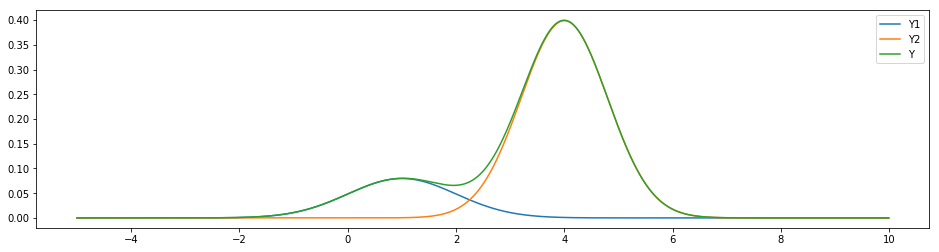

In [2]:
# plotting the pdf
import numpy as np
import matplotlib.pyplot as plt

plot_range = np.arange(-5,10,0.01)
pdf_Y1 = [((1.-pi_true)/(np.sqrt(2.*np.pi*stde_1_true**2.))) * 
          np.exp(-(x - mean_1_true)**2. / (2.*stde_1_true**2)) for x in plot_range]
pdf_Y2 = [(pi_true/(np.sqrt(2.*np.pi*stde_2_true**2.))) * 
          np.exp(-(x - mean_2_true)**2. / (2.*stde_2_true**2)) for x in plot_range]
pdf_Y = np.add(pdf_Y1,pdf_Y2)

plt.figure(figsize=(16,4))
plt.plot(plot_range,pdf_Y1, label="Y1")
plt.plot(plot_range,pdf_Y2, label="Y2")
plt.plot(plot_range,pdf_Y, label="Y")
plt.legend(loc="best")
plt.show()

# Generating samples from ground truth <a class="anchor" id="Generating samples from ground truth"></a>
We shall generate some samples $\mathbf{X}$ given the "true" parameters. 

We will then find the best parameter $\theta$ that fit into this model, in other words, maximise the expectation given the parameters  $\theta = \{\mu_1, \sigma_1, \mu_2, \sigma_2, \pi\}$ .

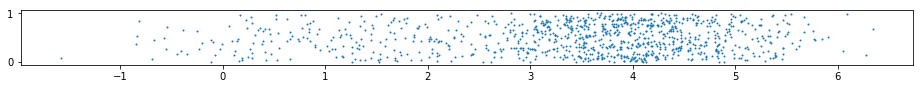

In [3]:
l = 1000
dot_size = 1.

samples = [stde_1_true*np.random.randn() + mean_1_true
           if np.random.random() > pi_true 
           else stde_2_true*np.random.randn() + mean_2_true
           for _ in range(l)]

plt.figure(figsize=(16,1))
plt.scatter(samples,np.random.random(l),s=dot_size)
plt.show()

Plotting histogram of samples

In [4]:
def plot_hist_pdf(samples_, pi_, mean_1_, mean_2_, stde_1_, stde_2_):
    plt.figure(figsize=(16,2))
    pdf_Y1 = [((1.-pi_)/(np.sqrt(2.*np.pi*stde_1_**2.))) * 
            np.exp(-(x - mean_1_)**2. / (2.*stde_1_**2)) for x in plot_range]
    pdf_Y2 = [(pi_/(np.sqrt(2.*np.pi*stde_2_**2.))) * 
            np.exp(-(x - mean_2_)**2. / (2.*stde_2_**2)) for x in plot_range]
    pdf_Y = np.add(pdf_Y1,pdf_Y2)
    plt.hist(samples, normed=True, bins=plot_range, color="orange")
    plt.plot(plot_range,pdf_Y1, label="Y1")
    plt.plot(plot_range,pdf_Y2, label="Y2")
    plt.plot(plot_range,pdf_Y, label="Y")
    plt.show()
    print("pi = {:.4f}, mean_1 = {:.4f}, mean_2 = {:.4f}, stde_1 = {:.4f}, stde_2 = {:.4f}"
      .format(pi_,mean_1_,mean_2_,stde_1_,stde_2_))
    
# making histograms take time
# https://stackoverflow.com/questions/44003552/matplotlib-histogram-from-numpy-histogram-output
# but this doesn't seem to be faster

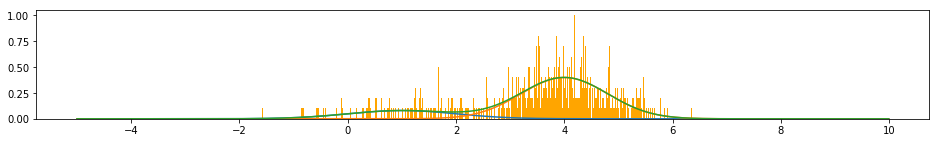

pi = 0.8000, mean_1 = 1.0000, mean_2 = 4.0000, stde_1 = 1.0000, stde_2 = 0.8000


In [5]:
plot_hist_pdf(samples, pi_true, mean_1_true, mean_2_true, stde_1_true, stde_2_true)

# Defining negative log-likelihood <a class="anchor" id="Defining negative log-likelihood"></a>

We want to maximise the expectation with respect to $\{p , \mu_1, \sigma_1, \mu_2, \sigma_2\}$:

$$\prod_i \left( 
\frac{1-p}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{p}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right) $$

We hope to maximize the log likelihood:

$$\log P(\mathbf{X} | \theta) = \ell(\theta | \mathbf{X}) = \sum_i log\left( 
\frac{1-p}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{p}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right) $$

We now calcalate log-likelihood w.r.t. ground truth for future reference.

In [6]:
def calc_nll(samples, pi_, mean_1_, mean_2_, stde_1_, stde_2_):
    l_ = len(samples)
    return -np.sum(
            np.log(
                (1-pi_)/(stde_1_*np.sqrt(2*np.pi))
                  *np.exp(-np.power(np.add(samples,[-mean_1_]*l_),2))/(2*stde_1_**2)
                + (pi_/(stde_2_*np.sqrt(2*np.pi)))
                  *np.exp(-np.power(np.add(samples,[-mean_2_]*l_),2))/(2*stde_2_**2)))

nll_true = calc_nll(samples, pi_true, mean_1_true, mean_2_true, stde_1_true, stde_2_true)

print("nll_true = {}".format(nll_true))

nll_true = 2142.34590388


# EM algorithm <a class="anchor" id="EM algorithm"></a>

The direct maximisation of $\ell(\theta,\mathbf{X})$ is "quite difficult numerically, because of the sum of terms inside the logarithm". Therefore we define a function $\ell {\left( \theta\right | \mathbf{X}, \mathbf{Z})}$ that is equal at $\theta = \theta_0$ but lower then $\ell(\theta | \mathbf{X})$ everywhere else. The interpretation of the $\mathbf{Z}$ is a vector of hidden variables taking values 0 or 1 that guesses which of $Y_1$ or $Y_2$ does each sample $x$ come from. If $z = 0$ then that sample comes from $Y_1$, if $z = 1$ then that sample comes from $Y_2$.

If we are given a vector $\mathbf(Z)$ of hidden variables, the expression becomes:

$$\log P(\mathbf{X} | \theta, \mathbf{Z}) = \ell(\theta, \mathbf{Z} | \mathbf{X}) = \sum_i log\left( 
\frac{1- z_i}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{z_i}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right) $$

Practically speaking, this then becomes the addition of the log likelihoods of exactly two different distributions, as we know exactly which distribution each sample comes from.

In [7]:
## we have arbitrary starting points which we will elaborate later
pi, mean_1, stde_1, mean_2, stde_2 = 0.8, 2.1, 1.1, 4.1, 3.81

## Expectation Step <a class="anchor" id="Expectation Step"></a>

Interpretation for $\gamma_i$: given current model $\theta$, $\gamma_i$ is the probability that the sample belongs to $\theta_2$ rather than $\theta_1$

$$\gamma_i(\theta) = E\left(z_i | \theta, \mathbf{X}\right) = Pr\left(z_i = 1 | \theta, \mathbf{X}\right) $$

$$ \hat{\gamma}_i = \frac{
\hat{p} \phi_{\hat{\theta}_2} ( x_i )
}{
(1 - \hat{p}) \phi_{\hat{\theta}_1} ( x_i ) + \hat{p} \phi_{\hat{\theta}_2} ( x_i )
} $$

In [16]:
def expectation_step(pi,mean_1,mean_2,stde_1,stde_2,samples):
    odds_Y1 = [((1-pi)/(stde_1*np.sqrt(2*np.pi))) 
                * np.exp(-(x - mean_1)**2. / (2. * stde_1**2)) for x in samples]
    odds_Y2 = [((pi)/(stde_2*np.sqrt(2*np.pi))) 
                * np.exp(-(x - mean_2)**2. / (2. * stde_2**2)) for x in samples]
    gamma_i = np.divide(odds_Y2,np.add(odds_Y1,odds_Y2))
    return gamma_i
# todo: call the step

### Insertion of Hidden Variables
We first observe that we can insert the hidden variables $z$ through the law of total probability.

$$
\begin{align} 
\log P(\mathbf{X} | \theta) &= \sum_i log P(x_i| \theta)   \\
&= \sum_i log\left(\sum_z P(x_i|z,\theta)P(z|\theta)\right) \\
&= \sum_i log\left( P(x_i|z =0,\theta)P(z=0|\theta) + P(x_i|z =1,\theta)P(z=1|\theta)\right)\\
\end{align}$$


This corresponds to
$$
\begin{align} 
\log P(\mathbf{X} | \theta) &= \sum_i log\left( \sum_z \left(
\frac{1- z}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{z}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right) \right) \cdot P(z|\theta)
\right) \\
&= \sum_i log\left( \left(
\frac{1- 0}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right)\right)\cdot P(z= 0) 
+ \left(\frac{1}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right) \cdot P(z=1) \right)
\right) \\ 
&= \sum_i log\left( 
\frac{(1-p)}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{(p)}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right)
\right)
\end{align}$$

This simplification shows us that the insertion of the hidden variables stil makes the expression mathematically equal to our $\log P(\mathbf{X} | \theta)$ expression at first.

### Derivation of $log P(\mathbf{X} | \mathbf{Z}, \theta)$

The form of $log P(\mathbf{X},\mathbf{Z} | \theta)$ is required in the Expectation step. It has been derived in the EM tutorial (and will be derived later) to be needed to find the next iteration of $\theta$. Hence, we want to find the form of $log P(\mathbf{X},\mathbf{Z} | \theta)$.

$$
\begin{align} 
\log P(\mathbf{X} ,\mathbf{Z} | \theta) &= \sum_i log P(x_i, z_i| \theta)   \\
&= \sum_i log\left( P(x_i|z_i,\theta)P(z_i|\theta)\right) \\
\end{align}$$

We observe that $P(z_i|\theta)$ refers to simply $(1-p)$ when $p=0$ or $p$ when $p = 1$. 

$$
\begin{align} 
\log P(\mathbf{X} ,\mathbf{Z}| \theta) &= \sum_i log \left(
\left(\frac{1- z_i}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right)\cdot (1-p)\right) 
+ \left(\frac{z_i}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right)\cdot(p)\right)
\right) \\
&= \sum_i log\left( 
\frac{(1- z_i)(1-p)}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{(z_i)(p)}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right)
\right)\\
&= \sum_i \left( (1- z_i)log\left(
\frac{(1-p)}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_1)^2} {2 \sigma_1^2}}\right) \right)
+ (z_i)log\left(\frac{(p)}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(\hat{x}_i - \mu_2)^2} {2 \sigma_2^2}}\right)\right)
\right)
\end{align}$$

The last step, which involves taking the indicator variables $(1- z_i)$ or $(z_i)$ outside the logarithm terms, holds as the expansion of the terms are equal.

## Maximisation Step <a class="anchor" id="Maximisation Step"></a>
With $\{y_i\}$, we can find the maximum of $\ell_0\left(\mathbf{Z},\Delta|\theta_n\right)$, which is at $\theta_{n+1}$

```Updating the model (how is each of them being derived?)```
PLEASE ADD

$$\begin{align}
\hat{\mu}_1 &= \frac{
\sum_{i=1}^N (1 - \hat{\gamma}_i) x_i
}{
\sum_{i=1}^N (1 - \hat{\gamma}_i)
} \\
\hat{\sigma}_1 &= \frac{
\sum_{i=1}^N (1 - \hat{\gamma}_i) (x_i - \hat{\mu}_2)^2
}{
\sum_{i=1}^N (1 - \hat{\gamma}_i)
} \\
\hat{\mu}_2 &= \frac{
\sum_{i=1}^N \hat{\gamma}_i x_i
}{
\sum_{i=1}^N \hat{\gamma}_i
} \\
\hat{\sigma}_2 &= \frac{
\sum_{i=1}^N \hat{\gamma}_i (x_i - \hat{\mu}_2)^2
}{
\sum_{i=1}^N \hat{\gamma}_i
} 
\end{align}$$

($\hat{\gamma}_i$ is analgous to $L_i$ with Numford's book)

In [9]:
def maximisation_step(gamma_i, samples):
    gamma_1_i = 1 - gamma_i
    pi = np.sum(gamma_i)/l
    mean_1 = np.sum(np.multiply(gamma_1_i,samples)) / np.sum(gamma_1_i)
    mean_2 = np.sum(np.multiply(gamma_i,samples)) / np.sum(gamma_i)
    stde_1 = np.sqrt(np.sum(np.multiply(gamma_1_i,
                            np.power(np.add(samples,[-mean_1]*l),2)))/np.sum(gamma_1_i))
    stde_2 = np.sqrt(np.sum(np.multiply(gamma_i,
                            np.power(np.add(samples,[-mean_2]*l),2)))/np.sum(gamma_i))
    return pi, mean_1, mean_2, stde_1, stde_2
# todo: call this step, show result

### Deriving $\theta_{n+1}$

From the EM tutorial, we see a way of iteration is to find a $\theta_{n+1}$ such that:

$$
\begin{align} 
\theta_{n+1} = argmax \left(\sum_z P(z|\mathbf{X}, \theta_n)\cdot log P(\mathbf{X},z |\theta) \right) \\
\end{align}$$

The expression for $log P(\mathbf{X},z |\theta)$ has been found above. We think of $P(z|\mathbf{X}, \theta_n)$ as the responsibility, $\gamma$. 

Interpretation for $\gamma_i$: given current model $\theta_n$, $\gamma_i$ is the probability that the $i$th sample belongs to $Y_2$ rather than $Y_1$. 

$$\gamma_i(\theta_n) = E\left(z_i | \theta_n, \mathbf{X}\right) = Pr\left(z_i = 1 | \theta_n, \mathbf{X}\right) $$

$$ {\gamma}_i = \frac{p_n \phi_{Y_2,n} ( x_i )}{(1 - p_n) \phi_{Y_1,n} ( x_i ) + p_n \phi_{Y_2,n} ( x_i )} $$

Combining both the expressions we have found above and the responsibilities, we get:

$$
\begin{align} 
\theta_{n+1} &= argmax \left(\sum_i \gamma_{i,n} \cdot log(p \cdot \phi_{Y_2}(x_i)) + (1 -\gamma_{i,n}) \cdot log((1-p) \cdot \phi_{Y_1}(x_i)) \right) \\
&= argmax \left(\sum_i \frac{p_n \phi_{Y_2,n} ( x_i )}{(1 - p_n) \phi_{Y_1,n} ( x_i ) + p_n \phi_{Y_2,n} ( x_i )} \cdot log(p \cdot \phi{Y_2}(x_i)) \\
\qquad + \left(1 -\frac{p_n \phi_{Y_2,n} ( x_i )}{(1 - p_n) \phi_{Y_1,n} ( x_i ) + p_n \phi_{Y_2,n} ( x_i )} \right) \cdot log((1-p) \cdot \phi{Y_1}(x_i)) \right) \\
\end{align}$$



# Performing iterations <a class="anchor" id="Performing iterations"></a>
We will do many iterations, and see their result.

## Setting the initial parameters <a class="anchor" id="Setting the initial parameters"></a>
We will need to start from a set of parameters to begin our parameters from. Perhaps we should use something that is reasonable. The initial mean for each of the distribution value should be slightly different from one another so they can start diverging.

$$\begin{align}
\hat{\mu}_1 &= +\epsilon + \frac{1}{N} \sum_{i=1}^N x_i \\
\hat{\sigma}_1 &= \sqrt{\frac{1}{N-1} \sum_{i=1}^N  (x_i - \hat{\mu}_2)^2} \\
\hat{\mu}_2 &= - \epsilon + \frac{1}{N} \sum_{i=1}^N x_i \\
\hat{\sigma}_2 &= \sqrt{\frac{1}{N-1} \sum_{i=1}^N  (x_i - \hat{\mu}_2)^2} \\
\hat{\pi} &= 0.5 
\end{align}$$

In [10]:
# the five parameters
pi = 0.5  # probability if it lies from 
mean_1 = np.mean(samples) - np.std(samples)
stde_1 = np.std(samples) 
mean_2 = np.mean(samples) + np.std(samples)
stde_2 = np.std(samples)

In [11]:
pi_list = [pi]
mean_1_list = [mean_1]
stde_1_list = [stde_1]
mean_2_list = [mean_2]
stde_2_list = [stde_2]
nll = calc_nll(samples, pi, mean_1, mean_2, stde_1, stde_2)
nll_list = [nll]

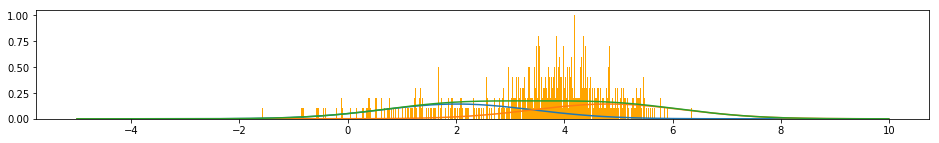

pi = 0.5000, mean_1 = 2.0219, mean_2 = 4.8172, stde_1 = 1.3976, stde_2 = 1.3976
interation 0, nll = 4113.06655139


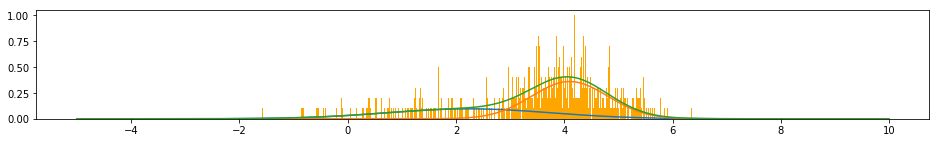

pi = 0.6355, mean_1 = 2.2349, mean_2 = 4.0990, stde_1 = 1.5116, stde_2 = 0.7046
interation 10, nll = 2405.26319839


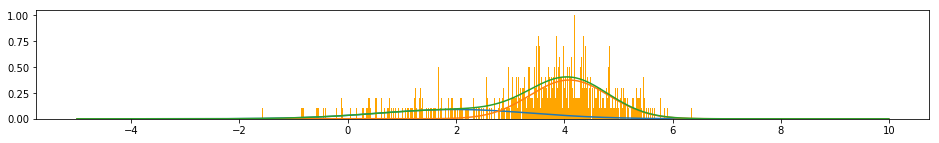

pi = 0.6816, mean_1 = 1.9858, mean_2 = 4.0893, stde_1 = 1.4107, stde_2 = 0.7263
interation 20, nll = 2311.81778605


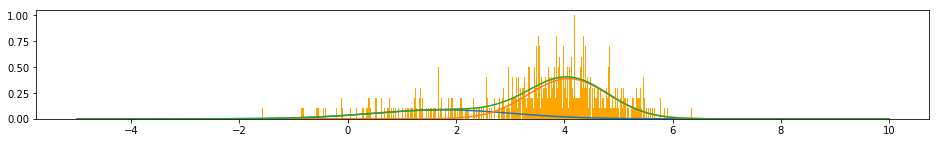

pi = 0.7197, mean_1 = 1.7435, mean_2 = 4.0723, stde_1 = 1.2881, stde_2 = 0.7402
interation 30, nll = 2213.09494808


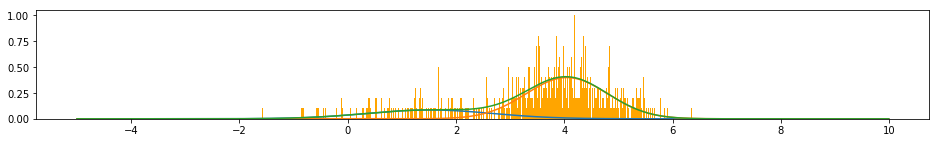

pi = 0.7524, mean_1 = 1.5138, mean_2 = 4.0467, stde_1 = 1.1576, stde_2 = 0.7528
interation 40, nll = 2130.31898846


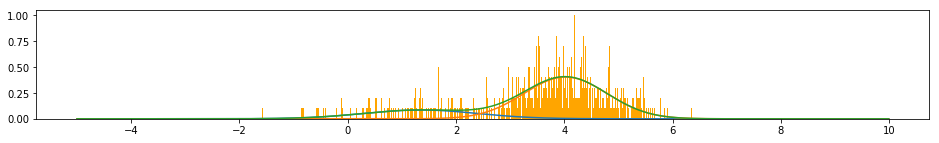

pi = 0.7753, mean_1 = 1.3437, mean_2 = 4.0211, stde_1 = 1.0540, stde_2 = 0.7660
interation 50, nll = 2087.84827484


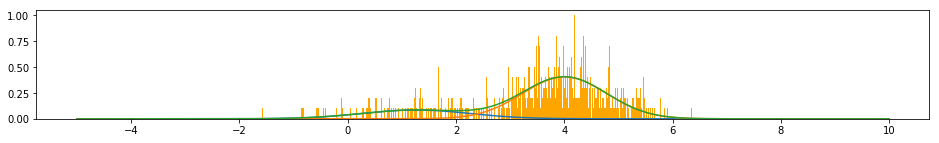

pi = 0.7871, mean_1 = 1.2552, mean_2 = 4.0051, stde_1 = 0.9987, stde_2 = 0.7757
interation 60, nll = 2076.73309388


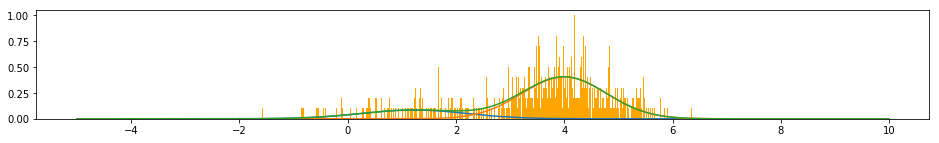

pi = 0.7917, mean_1 = 1.2205, mean_2 = 3.9982, stde_1 = 0.9771, stde_2 = 0.7802
interation 70, nll = 2075.37676331


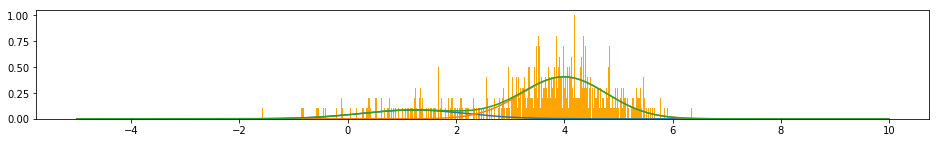

pi = 0.7933, mean_1 = 1.2087, mean_2 = 3.9958, stde_1 = 0.9698, stde_2 = 0.7819
interation 80, nll = 2075.38644568


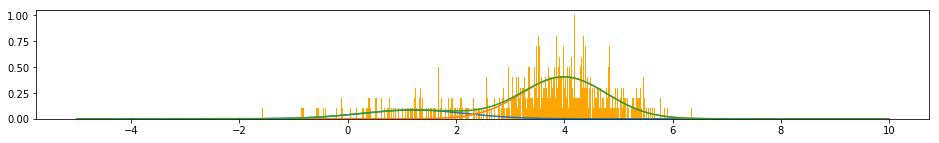

pi = 0.7938, mean_1 = 1.2049, mean_2 = 3.9949, stde_1 = 0.9675, stde_2 = 0.7825
interation 90, nll = 2075.44525453


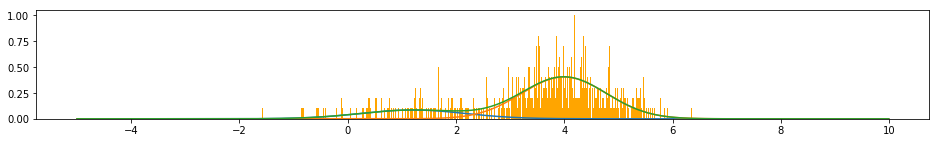

pi = 0.7939, mean_1 = 1.2037, mean_2 = 3.9947, stde_1 = 0.9667, stde_2 = 0.7827
interation 100, nll = 2075.46986138


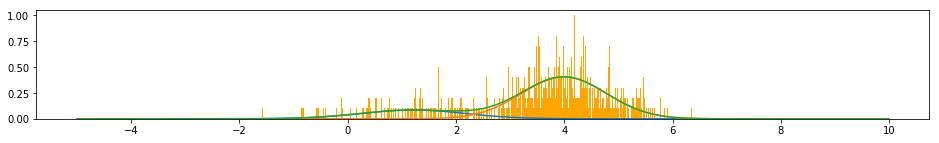

pi = 0.7940, mean_1 = 1.2033, mean_2 = 3.9946, stde_1 = 0.9665, stde_2 = 0.7827
interation 110, nll = 2075.47825454


In [12]:
iterations = 120
plotting = False
for x in range(iterations):
    
    if x%10 == 0:
        plot_hist_pdf(samples, pi, mean_1, mean_2, stde_1, stde_2)
        print("interation {}, nll = {}".format(x, nll))
    
    gamma_i = expectation_step(pi,mean_1,mean_2,stde_1,stde_2,samples)
#     odds_Y1 = [((1-pi)/(stde_1*np.sqrt(2*np.pi))) 
#                 * np.exp(-(x - mean_1)**2. / (2. * stde_1**2)) for x in samples]
#     odds_Y2 = [((pi)/(stde_2*np.sqrt(2*np.pi))) 
#                 * np.exp(-(x - mean_2)**2. / (2. * stde_2**2)) for x in samples]
#     gamma_i = np.divide(odds_Y2,np.add(odds_Y1,odds_Y2))
#     gamma_1_i = 1 - gamma_i
#     gamma_1_i = np.divide(odds_Y1,np.add(odds_Y1,odds_Y2))
    
#     pi = np.sum(gamma_i)/l
#     mean_1 = np.sum(np.multiply(gamma_1_i,samples)) / np.sum(gamma_1_i)
#     mean_2 = np.sum(np.multiply(gamma_i,samples)) / np.sum(gamma_i)
#     stde_1 = np.sqrt(np.sum(np.multiply(gamma_1_i,
#                             np.power(np.add(samples,[-mean_1]*l),2)))/np.sum(gamma_1_i))
#     stde_2 = np.sqrt(np.sum(np.multiply(gamma_i,
#                             np.power(np.add(samples,[-mean_2]*l),2)))/np.sum(gamma_i))
    
    pi, mean_1, mean_2, stde_1, stde_2 = maximisation_step(gamma_i, samples)
    
    pi_list.append(pi)
    mean_1_list.append(mean_1)
    stde_1_list.append(stde_1)
    mean_2_list.append(mean_2)
    stde_2_list.append(stde_2)
    nll = calc_nll(samples, pi, mean_1, mean_2, stde_1, stde_2)
    nll_list.append(nll)

### Statistics on the rate of decrease of nll

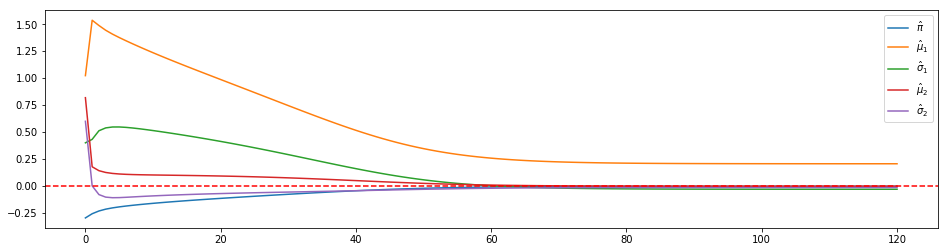

In [13]:
plt.figure(figsize=(16,4))
plt.plot(np.add(pi_list,-pi_true), label="$\hat{\pi}$")
plt.plot(np.add(mean_1_list,-mean_1_true), label="$\hat{\mu}_1$")
plt.plot(np.add(stde_1_list,-stde_1_true), label="$\hat{\sigma}_1$")
plt.plot(np.add(mean_2_list,-mean_2_true), label="$\hat{\mu}_2$")
plt.plot(np.add(stde_2_list,-stde_2_true), label="$\hat{\sigma}_2$")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc="best")
plt.show()

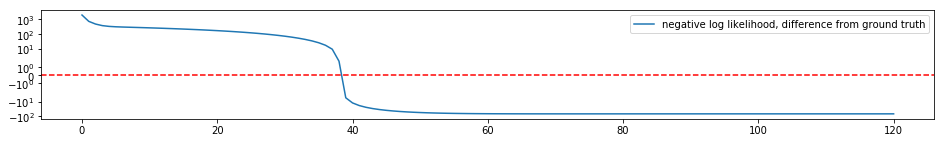

In [14]:
plt.figure(figsize=(16,2))
plt.plot(nll_list-nll_true, label="negative log likelihood, difference from ground truth")
plt.legend(loc="best")
plt.yscale('symlog')  # linear when near zero
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

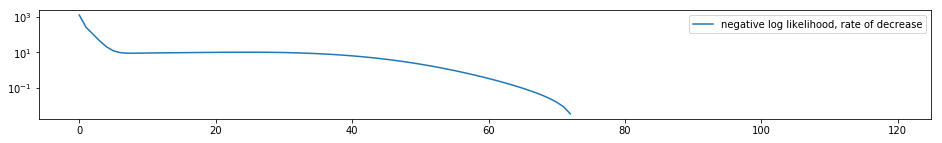

In [15]:
plt.figure(figsize=(16,2))
plt.plot(-np.diff(nll_list), 
             label="negative log likelihood, rate of decrease")
plt.legend(loc="best")
plt.yscale('log')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()